In [13]:
import torch
import matplotlib.pyplot as plt

In [14]:
cache = torch.load('../output/galsim_figs_cache/toy_separation.pt')

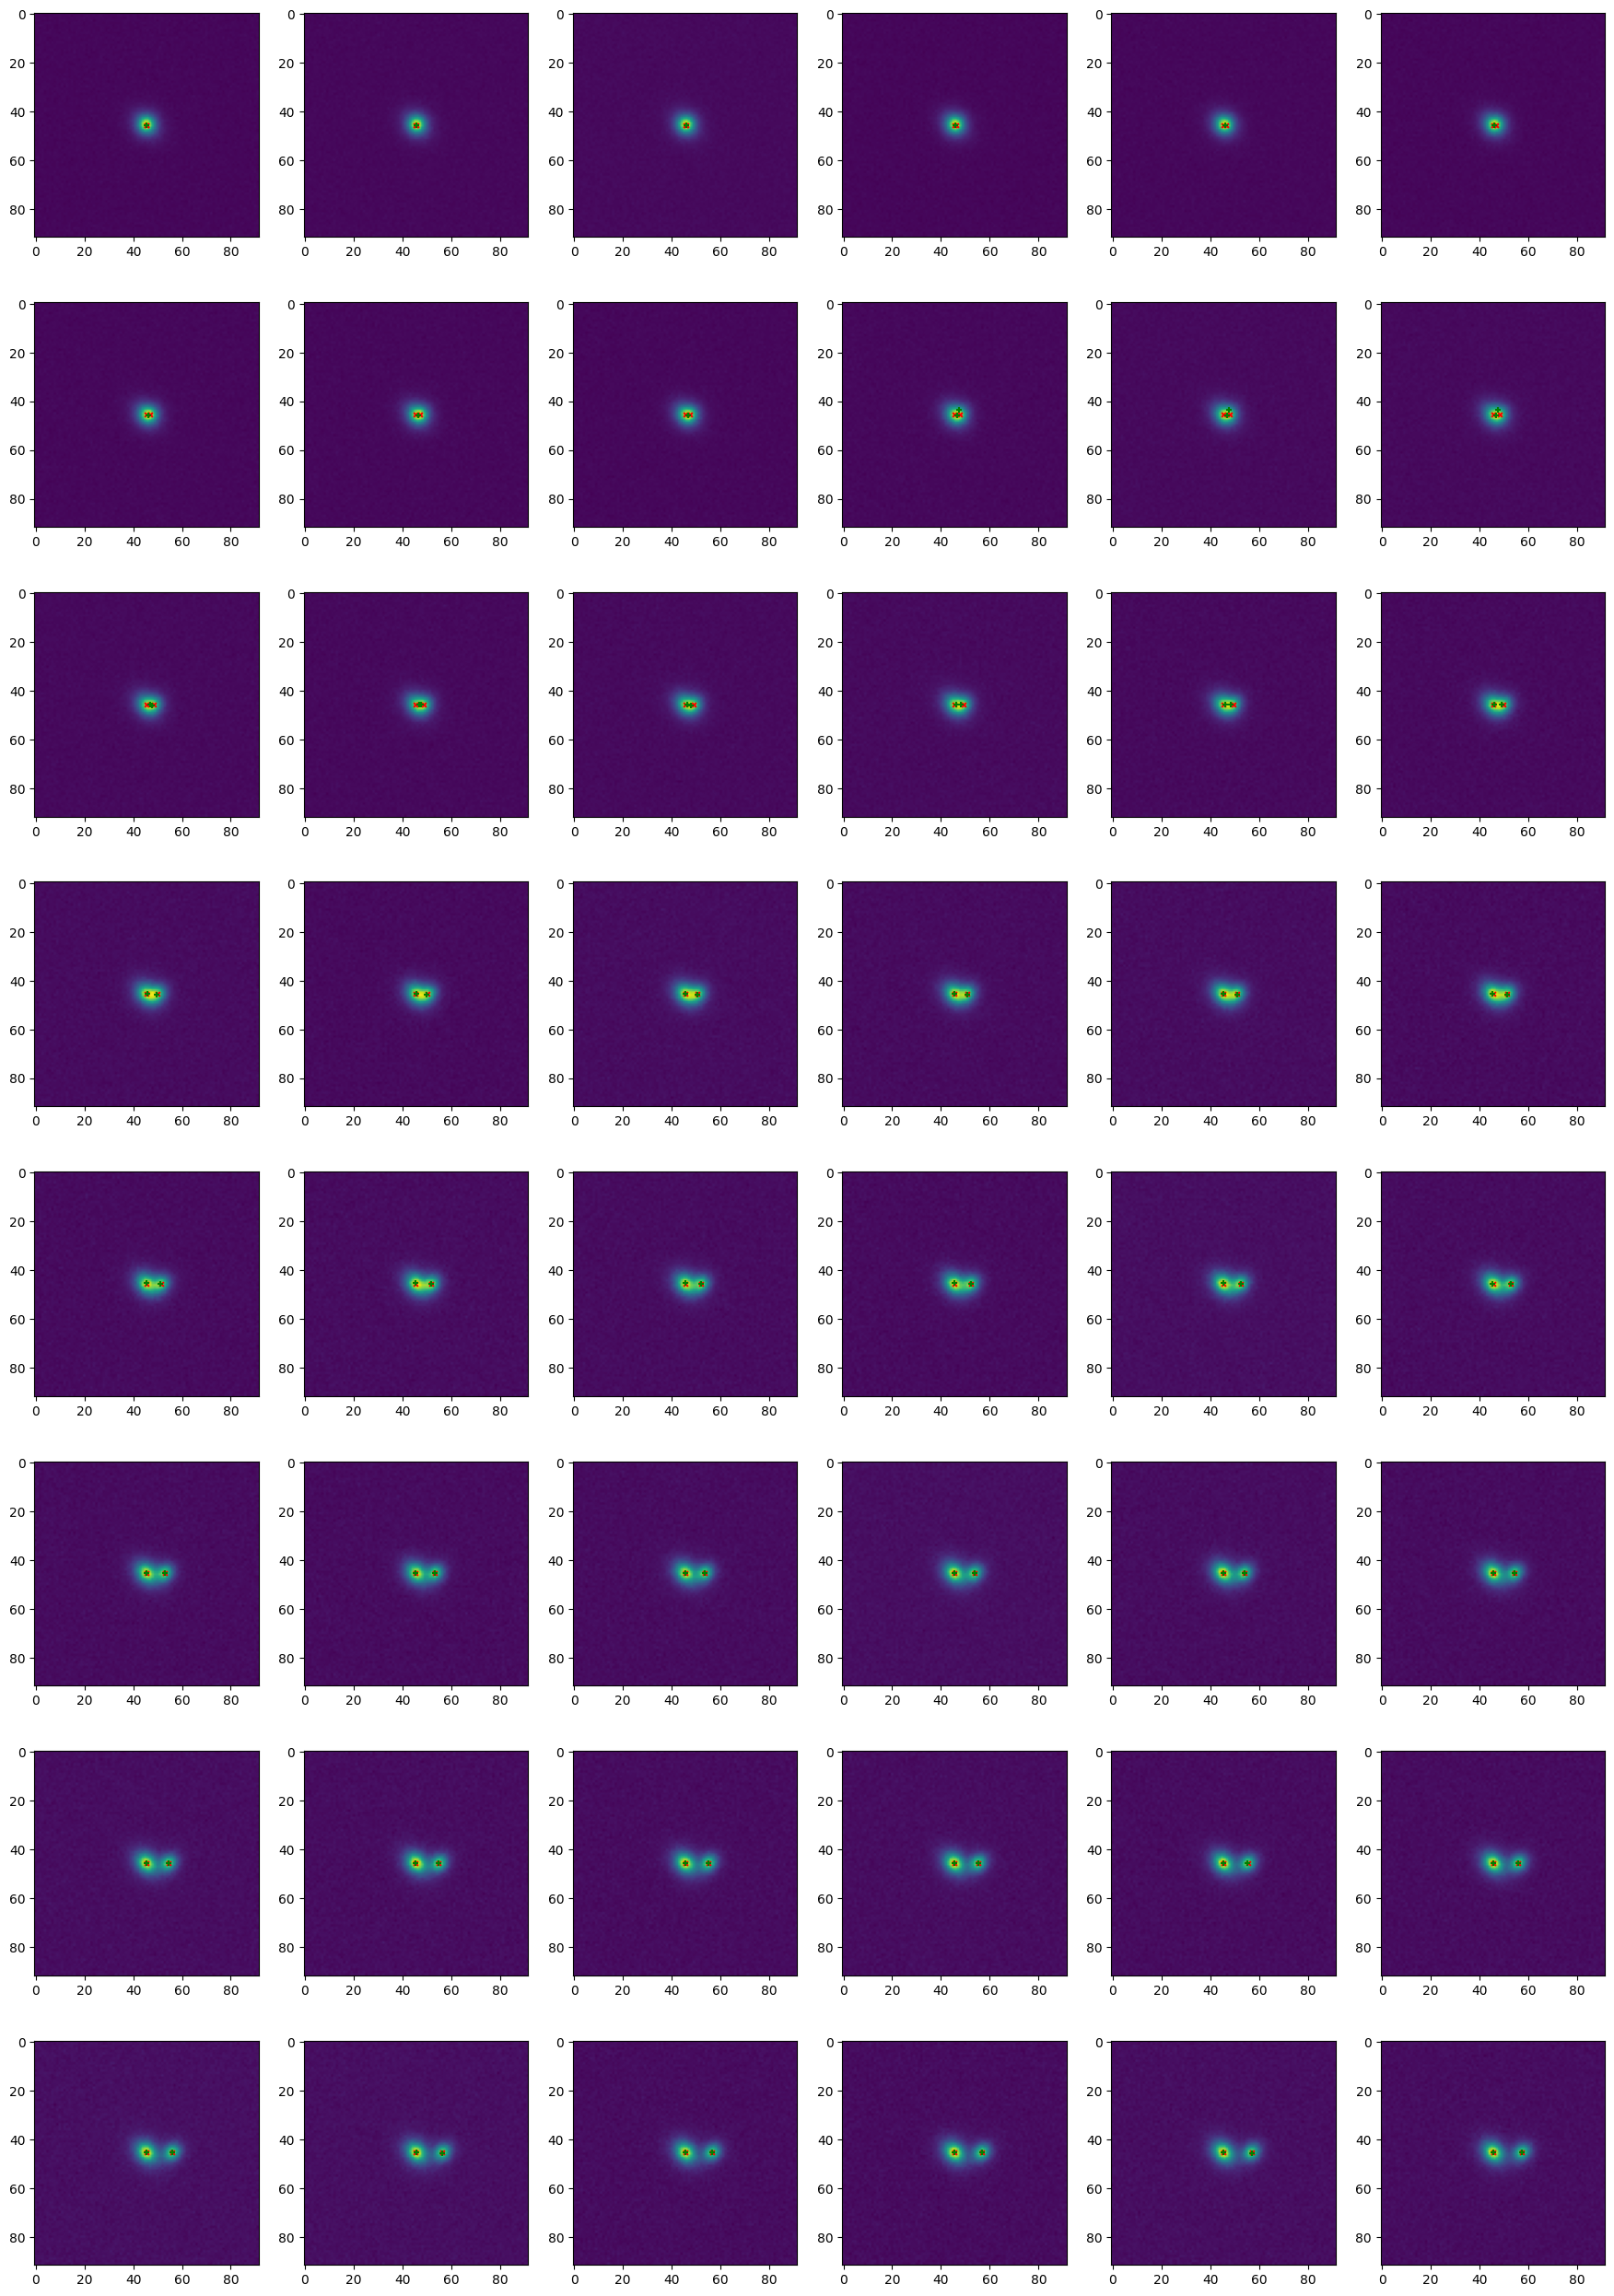

In [15]:
bp = 24
fig, axes = plt.subplots(8, 6, figsize=(22, 32))
axes = axes.flatten()
for ii in range(48):
    ax = axes[ii]
    image = cache['images'][ii, 0].numpy()
    tplocs = cache['truth']['ploc'][ii].numpy() + bp - 0.5 
    eplocs = cache['est']['ploc'][ii].numpy() + bp - 0.5
    assert image.shape == (92,92)
    ax.imshow(image)
    ax.scatter(tplocs[:,1], tplocs[:, 0], marker='x', color='r', s=12)
    ax.scatter(eplocs[:,1], eplocs[:, 0], marker='+', color='g', s=14)

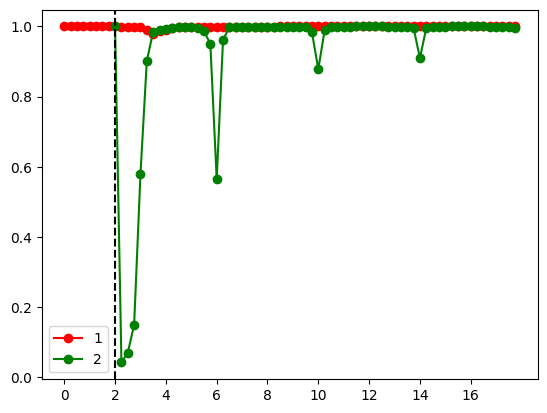

In [16]:
seps = cache['seps']
prob_n1 = cache['est']['prob_n_source'][:, 0].numpy()
prob_n2 = cache['est']['prob_n_source'][:, 1].numpy()

plt.plot(seps, prob_n1, '-or', label='1')
plt.plot(seps, prob_n2, '-og',label='2')

plt.axvline(2, color='k', ls='--')

plt.legend()
plt.xticks([sep for sep in seps if sep %2 ==0]);

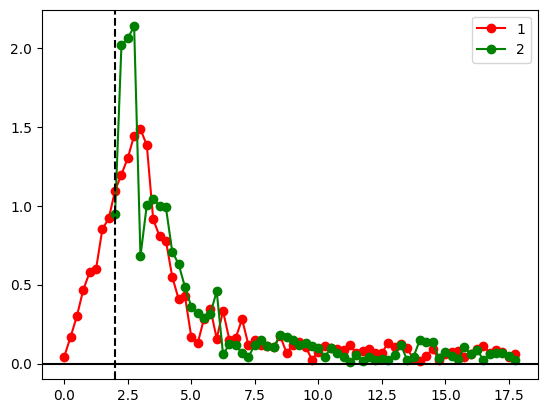

In [17]:
seps = cache['seps']
tploc1 = cache['truth']['ploc'][:, 0]
tploc2 = cache['truth']['ploc'][:, 1]

eploc1 = cache['est']['ploc'][:, 0]
eploc2 = cache['est']['ploc'][:, 1]

dist1 = (tploc1 - eploc1).pow(2).sum(1).sqrt().numpy()
dist2 = (tploc2 - eploc2).pow(2).sum(1).sqrt().numpy()

plt.plot(seps, dist1, '-or', label='1')
plt.plot(seps, dist2, '-og', label='2')
plt.axhline(0, ls='-', color='k')
plt.axvline(2, ls='--', color='k')

plt.legend()

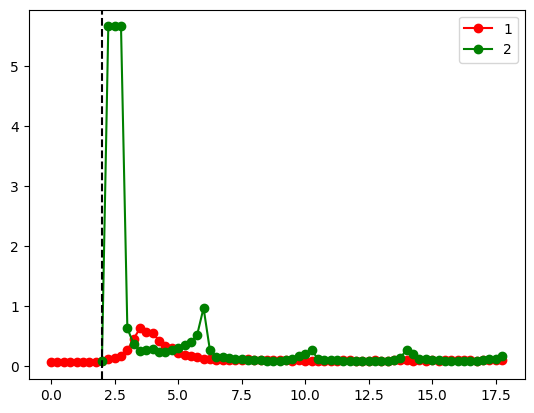

In [18]:
seps = cache['seps']
eploc_sd1 = cache['est']['ploc_sd'][:, 0].pow(2).sum(1).sqrt()
eploc_sd2 = cache['est']['ploc_sd'][:, 1].pow(2).sum(1).sqrt()

plt.plot(seps, eploc_sd1, '-or', label='1')
plt.plot(seps, eploc_sd2, '-og', label='2')
plt.axvline(2, ls='--', color='k')
    
plt.legend()

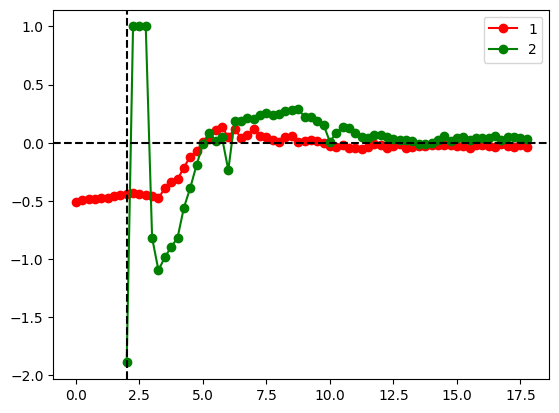

In [19]:
seps = cache['seps']
tflux1 = cache['truth']['flux'][:, 0].numpy()
tflux2 = cache['truth']['flux'][:, 1].numpy()

eflux1 = cache['est']['flux'][:, 0].numpy()
eflux2 = cache['est']['flux'][:, 1].numpy()


rflux1 = tflux1 - eflux1
rflux2 = tflux2 - eflux2

plt.plot(seps, rflux1/tflux1, '-or', label='1')
plt.plot(seps, rflux2/tflux2, '-og', label='2')
plt.axhline(0, ls='--', color='k')
plt.axvline(2, ls='--', color='k')
    
plt.legend()